<a href="https://colab.research.google.com/github/daffakf/pda/blob/main/065119168_Daffa_Ksatria_Firdaus_PDA_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining

Dataset ini terdiri dari 1000 baris data dengan berbagai atributnya yang bertipe kategori dan numerik. Dataset yang digunakan bersumber dari uci, berikut linknya:

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Pada notebook ini akan melakukan visualisasi data, menjelaskan central tendencies, menilai kualitas data, dan melakukan klasifikasi.

In [ ]:
# Mengimport library
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline
from google.colab import data_table
from vega_datasets import data

In [ ]:
# Load dataset diambil dari uci
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
attributes = ['Status-of-existing-checking-account', 'Duration-in-month', 'Credit-history', 'Purpose', 'Credit-amount', 'Savings-account/bonds', 'Present-employment-since', 'Installment-rate-in-percentage-of-disposable income', 'Personal-status-and-sex', 'Other-debtors/guarantors', 'Present-residence-since', 'Property', 'Age-in-years', 'Other-installment-plans' , 'Housing' , 'Number-of-existing-credits-at-this-bank' , 'Job' , 'Number-of-people-being-liable-to-provide-maintenance for', 'Telephone' , 'Foreign-worker', 'Class']
#df = pd.read_csv("https://raw.githubusercontent.com/daffakf/pda/main/assets/dataset/teori-uas/german.data", delim_whitespace=True, names=attributes) # Load dataset dari github
df = pd.read_csv(file_path, delim_whitespace=True, names=attributes)

In [ ]:
# Menampilkan isi Dataset
#data_table.enable_dataframe_formatter()
data_table.disable_dataframe_formatter()
df

,Status-of-existing-checking-account,Duration-in-month,Credit-history,Purpose,Credit-amount,Savings-account/bonds,Present-employment-since,Installment-rate-in-percentage-of-disposable income,Personal-status-and-sex,Other-debtors/guarantors,...,Property,Age-in-years,Other-installment-plans,Housing,Number-of-existing-credits-at-this-bank,Job,Number-of-people-being-liable-to-provide-maintenance for,Telephone,Foreign-worker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [ ]:
# Menampilkan/mengecek dataset (dtype dan lain-lain)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status-of-existing-checking-account                       1000 non-null   object
 1   Duration-in-month                                         1000 non-null   int64 
 2   Credit-history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit-amount                                             1000 non-null   int64 
 5   Savings-account/bonds                                     1000 non-null   object
 6   Present-employment-since                                  1000 non-null   object
 7   Installment-rate-in-percentage-of-disposable income       1000 non-null   int64 
 8   Personal-status-and-sex      

In [ ]:
df.keys()

Index(['Status-of-existing-checking-account', 'Duration-in-month',
       'Credit-history', 'Purpose', 'Credit-amount', 'Savings-account/bonds',
       'Present-employment-since',
       'Installment-rate-in-percentage-of-disposable income',
       'Personal-status-and-sex', 'Other-debtors/guarantors',
       'Present-residence-since', 'Property', 'Age-in-years',
       'Other-installment-plans', 'Housing',
       'Number-of-existing-credits-at-this-bank', 'Job',
       'Number-of-people-being-liable-to-provide-maintenance for', 'Telephone',
       'Foreign-worker', 'Class'],
      dtype='object')

# **Visualisasi Data**
Terdapat 21 kolom/atribut (1 kolom class), tetapi visualisasi dilakukan hanya pada atribut dengan tipe data numerik (int). Visualisasi dilakukan dengan diagram batang (histogram) pada atribut:
* Duration-in-month.
* Credit-amount.
* Installment-rate-in-percentage-of-disposable income.
* Present-residence-since.
* Age-in-years.
* Number-of-existing-credits-at-this-bank.
* Number-of-people-being-liable-to-provide-maintenance for.
* Class.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a948f7e10>,
      dtype=object)

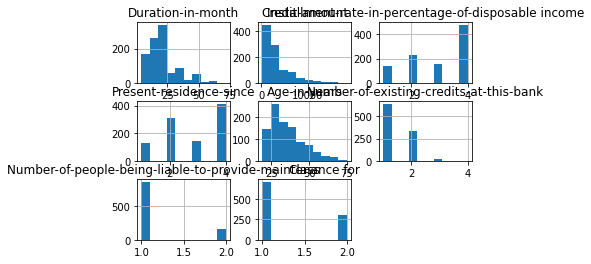

In [ ]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a944f6510>]],
      dtype=object)

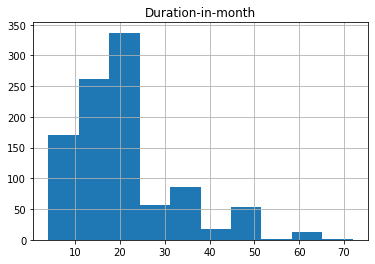

In [ ]:
# Duration-in-month
df.hist(column='Duration-in-month')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a93f97510>]],
      dtype=object)

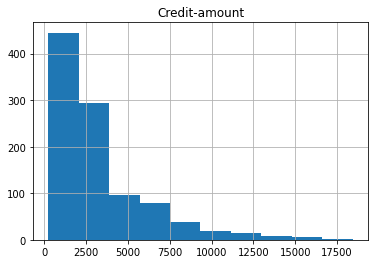

In [ ]:
# Credit-amount
df.hist(column='Credit-amount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a93f27610>]],
      dtype=object)

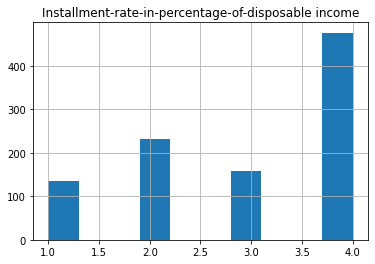

In [ ]:
# Installment-rate-in-percentage-of-disposable income
df.hist(column='Installment-rate-in-percentage-of-disposable income')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a93e89c10>]],
      dtype=object)

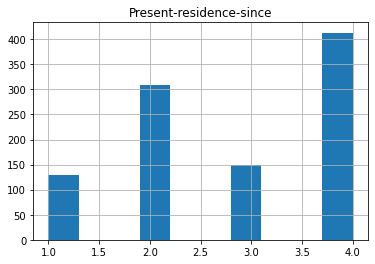

In [ ]:
# Present-residence-since
df.hist(column='Present-residence-since')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a93dd43d0>]],
      dtype=object)

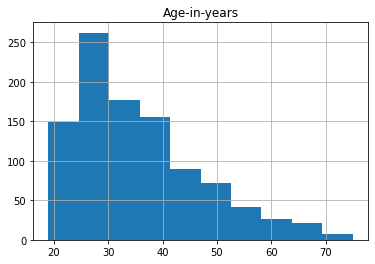

In [ ]:
# Age-in-years
df.hist(column='Age-in-years')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a93d33c50>]],
      dtype=object)

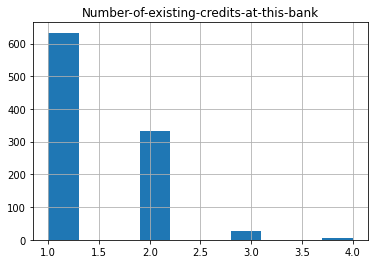

In [ ]:
# Number-of-existing-credits-at-this-bank
df.hist(column='Number-of-existing-credits-at-this-bank')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a93ccc210>]],
      dtype=object)

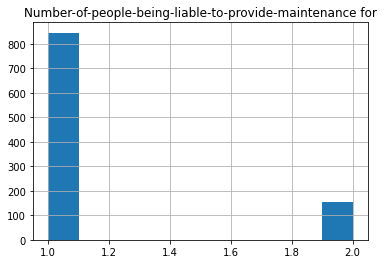

In [ ]:
# Number-of-people-being-liable-to-provide-maintenance for
df.hist(column='Number-of-people-being-liable-to-provide-maintenance for')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a944ebd10>]],
      dtype=object)

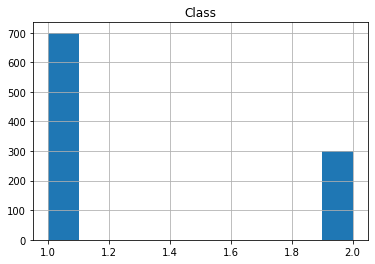

In [ ]:
# Class
df.hist(column='Class')

# **Central Tendencies**
Menjelaskan semua atribut secara *central tendencies* (Mean, Median, dan Modus). Semua atribut dicari *central tendencies*-nya namun disini hanya menampilkan hasil *central tendencies* data bertipe numerik, yaitu:
* Duration-in-month, 
 - memiliki mean : 20.903, modus : 24, dan median : 18.
* Credit-amount, 
 - memiliki mean : 3271.258, median : 2319.5, dan  modus : 1258, 1262, 1275, 1393, 1478 (nilai modus sama).
* Installment-rate-in-percentage-of-disposable income, 
 - memiliki mean : 2,973, modus : 4, dan median : 3.
* Present-residence-since, 
 - memiliki mean : 2.845, modus : 4, dan median : 3.
* Age-in-years, 
 - memiliki mean : 35.546, modus : 27, dan median : 33.
* Number-of-existing-credits-at-this-bank, 
 - memiliki mean : 1.407, modus : 1, dan median : 1.
* Number-of-people-being-liable-to-provide-maintenance for, 
 - memiliki mean : 1.155, modus : 1, dan median : 1.
* Class, 
 - memiliki mean : 1.3, modus : 1, dan median : 1.


## Tipe data numerik

In [ ]:
# Duration-in-month
print("mean :", st.mean(df['Duration-in-month']))
print("modus :", st.mode(df['Duration-in-month']))
print("median :", st.median(df['Duration-in-month']))

mean : 20.903
modus : 24
median : 18.0


In [ ]:
# Credit-amount
print("mean :", st.mean(df['Credit-amount']))
#print("modus :", st.mode(df['Credit-amount'])) # Terdapat 5 data dengan nilai modus sama
print("median :", st.median(df['Credit-amount']))

# Karena hasil untuk modus tidak muncul, maka coba pakai syntax lain
print ("")
print ("modus :", df['Credit-amount'].mode())

mean : 3271.258
median : 2319.5

modus : 0    1258
1    1262
2    1275
3    1393
4    1478
dtype: int64


In [ ]:
# Installment-rate-in-percentage-of-disposable income
print("mean :", st.mean(df['Installment-rate-in-percentage-of-disposable income']))
print("modus :", st.mode(df['Installment-rate-in-percentage-of-disposable income']))
print("median :", st.median(df['Installment-rate-in-percentage-of-disposable income']))

mean : 2.973
modus : 4
median : 3.0


In [ ]:
# Present-residence-since
print("mean :", st.mean(df['Present-residence-since']))
print("modus :", st.mode(df['Present-residence-since']))
print("median :", st.median(df['Present-residence-since']))

mean : 2.845
modus : 4
median : 3.0


In [ ]:
# Age-in-years
print("mean :", st.mean(df['Age-in-years']))
print("modus :", st.mode(df['Age-in-years']))
print("median :", st.median(df['Age-in-years']))

mean : 35.546
modus : 27
median : 33.0


In [ ]:
# Number-of-existing-credits-at-this-bank
print("mean :", st.mean(df['Number-of-existing-credits-at-this-bank']))
print("modus :", st.mode(df['Number-of-existing-credits-at-this-bank']))
print("median :", st.median(df['Number-of-existing-credits-at-this-bank']))

mean : 1.407
modus : 1
median : 1.0


In [ ]:
# Number-of-people-being-liable-to-provide-maintenance for
print("mean :", st.mean(df['Number-of-people-being-liable-to-provide-maintenance for']))
print("modus :", st.mode(df['Number-of-people-being-liable-to-provide-maintenance for']))
print("median :", st.median(df['Number-of-people-being-liable-to-provide-maintenance for']))

mean : 1.155
modus : 1
median : 1.0


In [ ]:
# Class
print("mean :", st.mean(df['Class']))
print("modus :", st.mode(df['Class']))
print("median :", st.median(df['Class']))

mean : 1.3
modus : 1
median : 1.0


## TIpe data kategorik

In [ ]:
# Status-of-existing-checking-account
print("modus dari Status-of-existing-checking-account :", df['Status-of-existing-checking-account'].mode())

modus dari Status-of-existing-checking-account : 0    A14
dtype: object


In [ ]:
# Credit-history
print("modus dari Credit-history :", df['Credit-history'].mode())

modus dari Credit-history : 0    A32
dtype: object


In [ ]:
# Savings-account/bonds
print("modus dari Savings-account/bonds :", df['Savings-account/bonds'].mode())

modus dari Savings-account/bonds : 0    A61
dtype: object


In [ ]:
# Present-employment-since
print("modus dari Present-employment-since :", df['Present-employment-since'].mode())

modus dari Present-employment-since : 0    A73
dtype: object


In [ ]:
# Personal-status-and-sex
print("modus dari Personal-status-and-sex :", df['Personal-status-and-sex'].mode())

modus dari Personal-status-and-sex : 0    A93
dtype: object


In [ ]:
# Other-debtors/guarantors
print("modus dari Other-debtors/guarantors :", df['Other-debtors/guarantors'].mode())

modus dari Other-debtors/guarantors : 0    A101
dtype: object


In [ ]:
# Property
print("modus dari Property :", df['Property'].mode())

modus dari Property : 0    A123
dtype: object


In [ ]:
# Other-installment-plans
print("modus dari Other-installment-plans :", df['Other-installment-plans'].mode())

modus dari Other-installment-plans : 0    A143
dtype: object


In [ ]:
# Housing
print("modus dari Housing :", df['Housing'].mode())

modus dari Housing : 0    A152
dtype: object


In [ ]:
# Job
print("modus dari Job :", df['Job'].mode())

modus dari Job : 0    A173
dtype: object


In [ ]:
# Telephone
print("modus dari Telephone :", df['Telephone'].mode())

modus dari Telephone : 0    A191
dtype: object


In [ ]:
# Foreign-worker
print("modus dari Foreign-worker :", df['Foreign-worker'].mode())

modus dari Foreign-worker : 0    A201
dtype: object


# **Menilai Kualitas Data**

Menilai kualitas data memerlukan pemeriksaan karakteristiknya dan kemudian menimbang karakteristik tersebut sesuai dengan apa yang paling penting bagi organisasi dan aplikasi yang digunakan.

- Lengkap (Complete)

Dataset tersebut lengkap (tidak memiliki *missing value*). Data tidak lengkap sama berbahayanya dengan data yang tidak akurat. 

- Kredibilitas

Dataset tersebut memiliki kredibilitas tinggi karena disediakan oleh salah satu profesor dari Universitas Hamburg.

## **Mengecek Missing Value**

In [ ]:
# Mengecek apakah terdapat atribut yang memiliki missing value
print(df.isnull().sum())

Status-of-existing-checking-account                         0
Duration-in-month                                           0
Credit-history                                              0
Purpose                                                     0
Credit-amount                                               0
Savings-account/bonds                                       0
Present-employment-since                                    0
Installment-rate-in-percentage-of-disposable income         0
Personal-status-and-sex                                     0
Other-debtors/guarantors                                    0
Present-residence-since                                     0
Property                                                    0
Age-in-years                                                0
Other-installment-plans                                     0
Housing                                                     0
Number-of-existing-credits-at-this-bank                     0
Job     

## **Outlier**
Pengertian dari **Outlier** adalah data observasi yang muncul dengan nilai-nilai ekstrim, baik secara univariat ataupun multivariat. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Cara mendeteksi **Outlier** adalah dengan melihat jarak antara rata-rata dan median sekelompok data tersebut. Semakin jauh jarak antara rata-rata dan mediannya maka semakin besar kemungkinan adanya outlier dalam sekelompok data tersebut.

Berdasarkan pengertian Outlier diatas, pada dataset ini salah satu atribut yang memiliki outlier menurut saya adalah atribut `Credit-amount` dan `Age-in-years`, karena memiliki jarak antara rata-rata dan median yang terbilang besar.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a93b832d0>]],
      dtype=object)

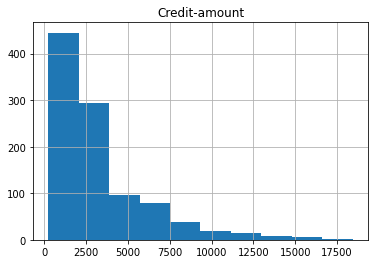

In [ ]:
df.hist(column='Credit-amount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a938fcb90>]],
      dtype=object)

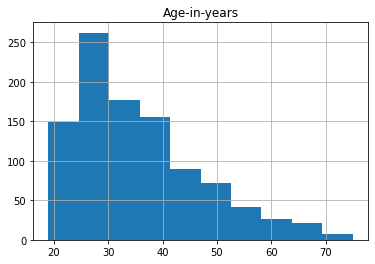

In [ ]:
df.hist(column='Age-in-years')

# **Klasifikasi**
Dilakukan klasifikasi dengan metode KNN (K-Nearest Neighbors) dan Naive Bayes. 

- Langkah pertama yang dilakukan adalah mengubah tipe data semua atribut menjadi numerik.
- Kemudian dilakukan pembagian dataset, dataset dibagi menjadi data training dan data testing. Komposisi **75% data training** dan **25% data testing**.
- Tahap testing dengan metode KNN dan Naive Bayes.
- Mencari nilai akurasi dengan confusion metrics.

Hasil klasifikasi didapatkan nilai akurasi sebesar **67,6%** untuk KNN dan **72%** untuk Naive Bayes.



In [ ]:
#x = df[['Status-of-existing-checking-account', 'Duration-in-month', 'Credit-history', 'Purpose', 'Credit-amount', 'Savings-account/bonds', 'Present-employment-since', 'Installment-rate-in-percentage-of-disposable income', 'Personal-status-and-sex', 'Other-debtors/guarantors', 'Present-residence-since', 'Property', 'Age-in-years', 'Other-installment-plans' , 'Housing' , 'Number-of-existing-credits-at-this-bank' , 'Job' , 'Number-of-people-being-liable-to-provide-maintenance for', 'Telephone' , 'Foreign-worker']] .values
x = df.iloc[:, :-1] .values # menggambil data dari kolom 1-20
y = df.iloc[:, 20] .values # menggambil data kolom ke-21

In [ ]:
# menampilkan semua data array x
x

array([['A11', 6, 'A34', ..., 1, 'A192', 'A201'],
       ['A12', 48, 'A32', ..., 1, 'A191', 'A201'],
       ['A14', 12, 'A34', ..., 2, 'A191', 'A201'],
       ...,
       ['A14', 12, 'A32', ..., 1, 'A191', 'A201'],
       ['A11', 45, 'A32', ..., 1, 'A192', 'A201'],
       ['A12', 45, 'A34', ..., 1, 'A191', 'A201']], dtype=object)

In [ ]:
# menampilkan beberapa baris pertama data array y
y[0:20]

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1])

In [ ]:
# mengubah type data menjadi numerik
from sklearn import preprocessing

x_new = x
le = preprocessing.LabelEncoder()
x_new[:, 0] = le.fit_transform(x[:, 0]) 
x_new[:, 2] = le.fit_transform(x[:, 2])
x_new[:, 3] = le.fit_transform(x[:, 3])
x_new[:, 5] = le.fit_transform(x[:, 5])
x_new[:, 6] = le.fit_transform(x[:, 6])
x_new[:, 8] = le.fit_transform(x[:, 8])
x_new[:, 9] = le.fit_transform(x[:, 9])
x_new[:, 11] = le.fit_transform(x[:, 11])
x_new[:, 13] = le.fit_transform(x[:, 13])
x_new[:, 14] = le.fit_transform(x[:, 14])
x_new[:, 16] = le.fit_transform(x[:, 16])
x_new[:, 18] = le.fit_transform(x[:, 18])
x_new[:, 19] = le.fit_transform(x[:, 19])

In [ ]:
x_new[0:3]

array([[0, 6, 4, 4, 1169, 4, 4, 4, 2, 0, 4, 0, 67, 2, 1, 2, 2, 1, 1, 0],
       [1, 48, 2, 4, 5951, 0, 2, 2, 1, 0, 2, 0, 22, 2, 1, 1, 2, 1, 0, 0],
       [3, 12, 4, 7, 2096, 0, 3, 2, 2, 0, 3, 0, 49, 2, 1, 1, 1, 2, 0, 0]],
      dtype=object)

### Membagi dataset menjadi data traning dan data testing dengan komposisi sebesar **75% data training dan 25% data testing**.

In [ ]:
from sklearn.model_selection import train_test_split

# membagi dataset menjadi data traning dan data testing dengan komposisi sebesar 75% data training dan 25% data testing
x_train, x_test, y_train, y_test = train_test_split(x_new,y, test_size=0.25, random_state=0) # 75% untuk train dan 25% untuk test
print ('Train set :', x_train.shape, y_train.shape)
print ('Test set :', x_test.shape, y_test.shape)

Train set : (750, 20) (750,)
Test set : (250, 20) (250,)


## KNN (K-Nearest Neighbor)

In [ ]:
# Import library 
from sklearn.neighbors import KNeighborsClassifier # classifier K-Nearest Neighbors
from sklearn import metrics # Perhitungan akurasi dengan metrics
from sklearn.metrics import confusion_matrix # Ukur performance menggunakan confusion matrix

In [ ]:
# Menentukan nilai k = 4
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Memprediksi data
knn.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

### Mencari Nilai Akurasi

In [ ]:
# mengukur performance menggunakan confusion matrix
cm = confusion_matrix(y_test, knn.predict(x_test))
cm

array([[159,  17],
       [ 64,  10]])

![alt text](https://miro.medium.com/max/1064/1*5XuZ_86Rfce3qyLt7XMlhw.png)

berdasarkan gambar di atas nilai akurasi didapatkan dengan rumus

- **Akurasi = TP + TN / TP + FP + FN + TN**

      AKurasi = 169 / 250

              = 0.676 atau 67,6%

sehingga untuk metode Naive Bayes didapatkan akurasi sebesar **67,6%**

In [ ]:
# Perhitungan akurasi dengan metrics
print ('Train set akurasi:', metrics.accuracy_score(y_train, knn.predict(x_train)))
print ('Test set akurasi:', metrics.accuracy_score(y_test, knn.predict(x_test)))

Train set akurasi: 0.764
Test set akurasi: 0.676


## Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[ 1.14180917,  0.27781426,  0.40669939, ..., -0.41678402,
        -0.83937206, -0.19324699],
       [ 1.14180917,  2.28934151, -1.41979487, ..., -0.41678402,
        -0.83937206, -0.19324699],
       [ 1.14180917, -0.72794936,  1.31994652, ..., -0.41678402,
         1.19136679, -0.19324699],
       ...,
       [ 1.14180917, -0.97939026, -0.50654774, ..., -0.41678402,
        -0.83937206, -0.19324699],
       [-0.44550664, -0.22506755,  1.31994652, ..., -0.41678402,
        -0.83937206, -0.19324699],
       [-0.44550664,  1.28357788,  0.40669939, ...,  2.39932423,
         1.19136679, -0.19324699]])

In [ ]:
from sklearn.naive_bayes import GaussianNB # classifier Naive Bayes

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# mendeklarasikan variabel y_pred
y_pred = classifier.predict(x_test)

### Mencari Nilai Akurasi

In [ ]:
# mengukur performance menggunakan confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[130,  46],
       [ 24,  50]])

![alt text](https://miro.medium.com/max/1064/1*5XuZ_86Rfce3qyLt7XMlhw.png)

berdasarkan gambar di atas nilai akurasi didapatkan dengan rumus 

- **Akurasi = TP + TN / TP + FP + FN + TN**

        AKurasi = 180 / 250

                = 0.72 atau 72%

sehingga untuk metode Naive Bayes didapatkan akurasi sebesar **72%**

In [ ]:
# Perhitungan akurasi dengan metrics
print ('Train set akurasi:', metrics.accuracy_score(y_train, classifier.predict(x_train)))
print ('Test set akurasi:', metrics.accuracy_score(y_test, classifier.predict(x_test)))

Train set akurasi: 0.7373333333333333
Test set akurasi: 0.72
